Nama : Fauzan Musyaffa <br>
NIM : 211351158 <br>
Kelas : Malam B

# import Dataset

In [76]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fauzanmusyaffa","key":"36dd89fd49fe7aec827644b4759df285"}'}

In [77]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [78]:
!kaggle datasets download -d ishigamisenku10/hiv-prediction --force

  0% 0.00/3.58k [00:00<?, ?B/s]
100% 3.58k/3.58k [00:00<00:00, 7.81MB/s]


In [79]:
!unzip hiv-prediction.zip

Archive:  hiv-prediction.zip
  inflating: HIV_dataset.csv         


# import library yang digunakan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data Discovery

In [81]:
df = pd.read_csv('HIV_dataset.csv')

In [82]:
df.sample()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
528,78,Divorced,NO,College Degree,YES,YES,Internet,Heterosexual,YES,POSITIVE


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  698 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [84]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [85]:
numerical

['Age']

In [86]:
catgcols

['Marital Staus',
 'STD',
 'Educational Background',
 'HIV TEST IN PAST YEAR',
 'AIDS education',
 'Places of seeking sex partners',
 'SEXUAL ORIENTATION',
 'Drug- taking',
 'Result']

In [87]:
df['Result'].value_counts()

NEGATIVE    349
POSITIVE    343
Positive      3
Negative      3
Name: Result, dtype: int64

In [88]:
df['Result'] =df['Result'].replace(['Positive'],'POSITIVE')
df['Result'] =df['Result'].replace(['Negative'],'NEGATIVE')

In [89]:
df['Result'].value_counts()

NEGATIVE    352
POSITIVE    346
Name: Result, dtype: int64

In [90]:
ind_col = [col for col in df.columns if col != 'Result']
dep_col = 'Result'

In [91]:
df[dep_col].value_counts()

NEGATIVE    352
POSITIVE    346
Name: Result, dtype: int64

# EDA (minimal 5)

<Axes: xlabel='Result', ylabel='count'>

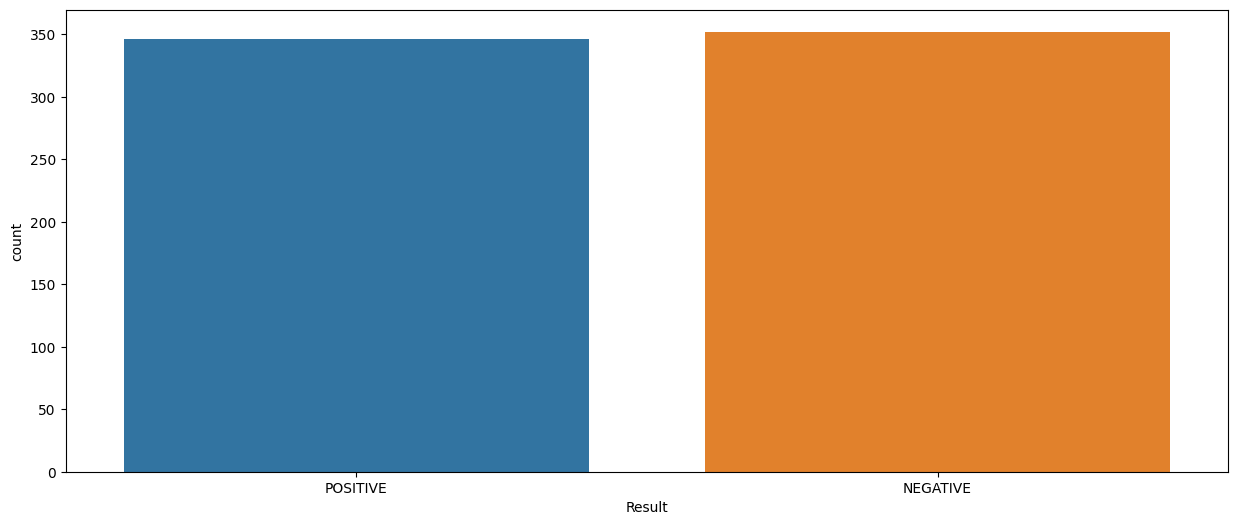

In [92]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result")

<Axes: xlabel='Result', ylabel='count'>

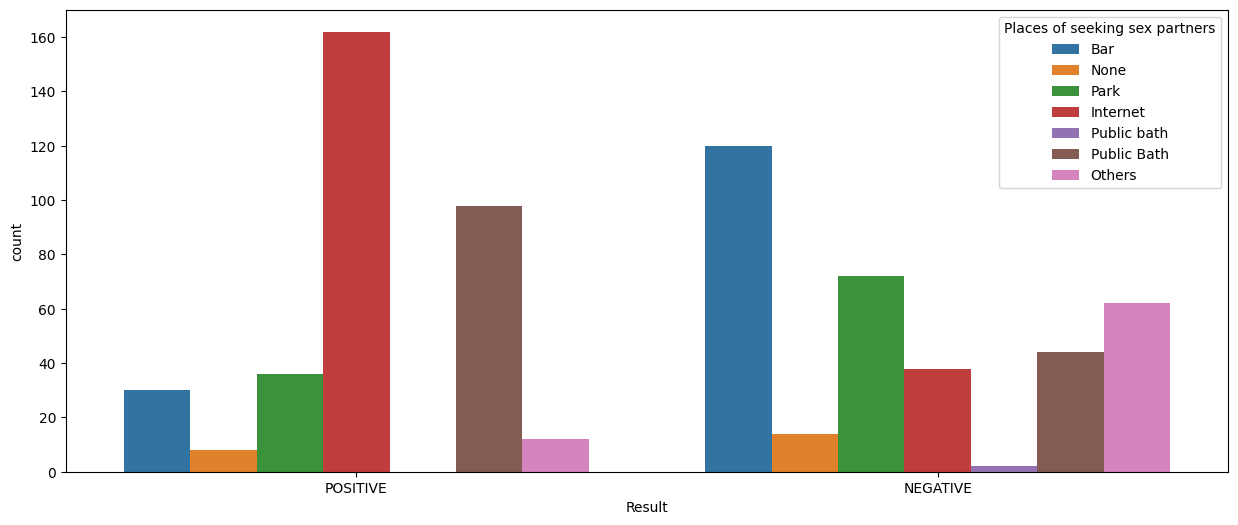

In [93]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="Places of seeking sex partners")

<Axes: xlabel='Result', ylabel='count'>

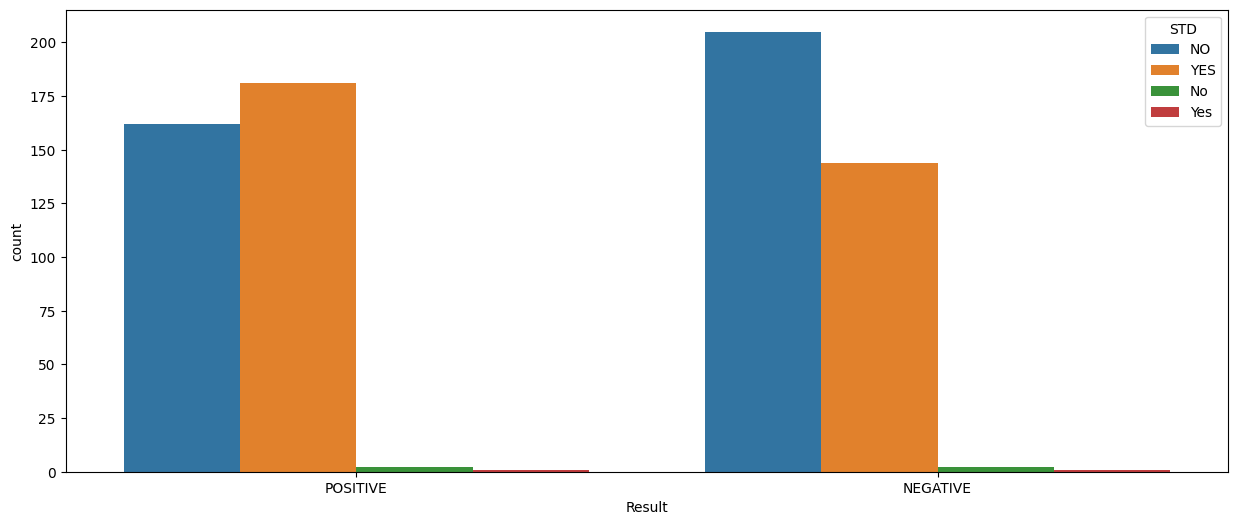

In [94]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="STD")

<Axes: xlabel='Result', ylabel='count'>

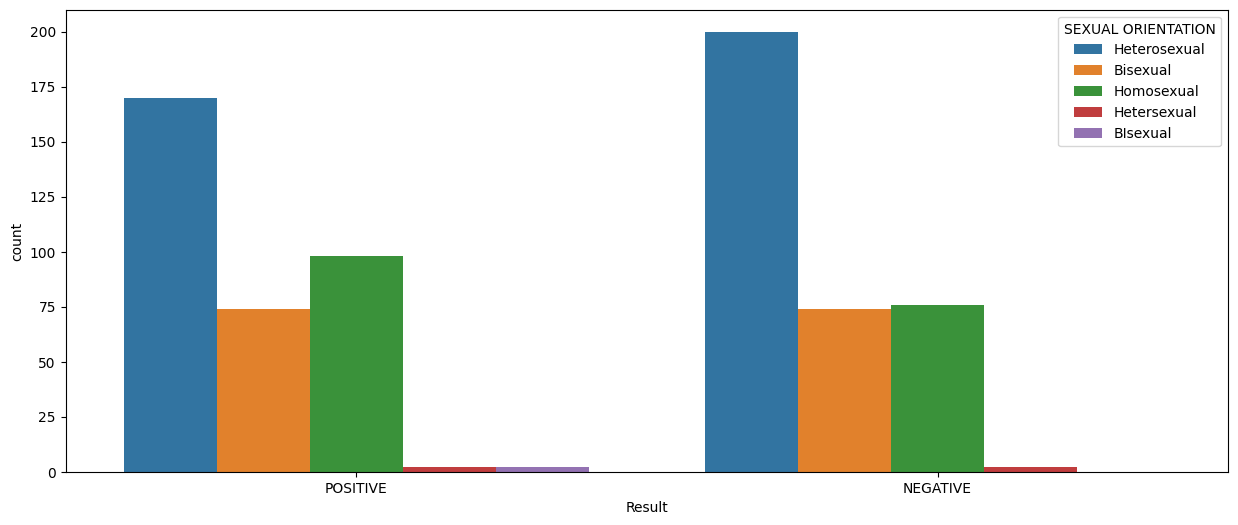

In [95]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Result", hue="SEXUAL ORIENTATION")

<Figure size 1500x600 with 0 Axes>

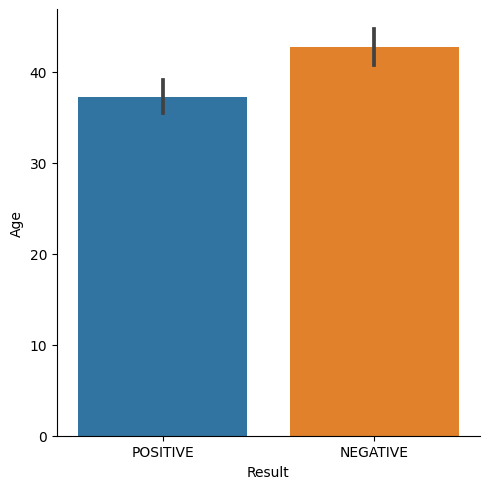

In [96]:
plt.figure(figsize=(15,6))
sns.catplot(data=df, kind="bar", x="Result", y="Age")

# Preprocessing

In [97]:
le = LabelEncoder()

for col in catgcols:
    df[col] =le.fit_transform(df[col])

In [98]:
df['Result'] = le.fit_transform(df['Result'])

In [99]:
x = df[ind_col]
y = df[dep_col]

In [100]:
df.head()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,5,0,0,1,0,0,2,2,1
1,20,5,0,0,0,2,2,2,0,0
2,23,4,2,0,0,2,2,1,0,0
3,24,4,0,0,1,2,4,2,2,1
4,18,5,2,5,1,0,1,2,2,1


In [101]:
df.to_csv('HIV_dataset.csv')

# modeling

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [103]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_true = y_test

In [105]:
input_data = (22,5,0,0,1,0,0,2,2)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model1.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print ('Pasien tidak terkena HIV')
else:
    print ('Pasien terkena HIV')

[1]
Pasien tidak terkena HIV


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

In [110]:
score = model1.score(x_test, y_test)
print('akurasi model knn = ', score)
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred1))
print("\nClassification Report:")
print(classification_report(y_true, y_pred1))

akurasi model knn =  0.7071428571428572
Confusion Matrix:
[[44 22]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        66
           1       0.71      0.74      0.73        74

    accuracy                           0.71       140
   macro avg       0.71      0.70      0.71       140
weighted avg       0.71      0.71      0.71       140



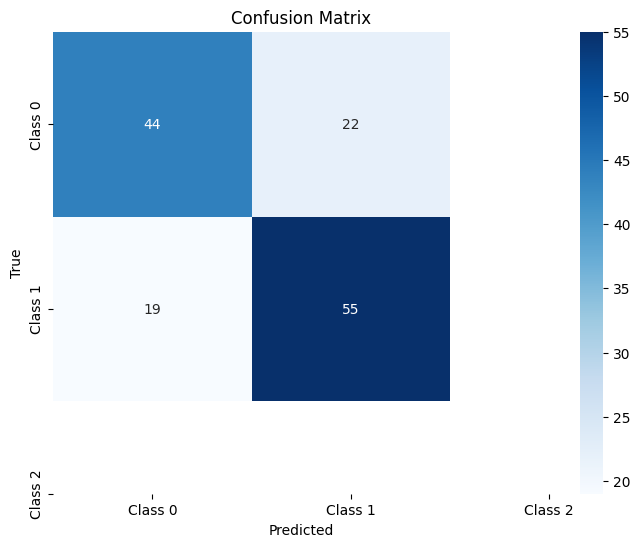

In [109]:
cm = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# save model (pickle)

In [107]:
filename = 'HIV.sav'
pickle.dump(model1, open(filename, 'wb'))